# Lab 3: Scikit Learn and Regression

Deadline Tuesday 4/6/21  11:59 pm 

**scikit-learn** is a popular machine learning package that contains a variety of models and tools. In this lab and lab 4 we will work with different models provided by **scikit-learn** package and build several models.

All objects within scikitt-learn share a uniform common basic API consisting of 3 interfaces: an _estimator_ interface for building and fitting models, a _predictor_ interface for making predictions, and a _transformer_ interface for converting data.

>The _estimator_  interface defines object mechanism and a fit method for learning a model from training data. All supervised and unsupervised learning algorithms are offered as objects implementing this interface. Other machine learning tasks such as _feature extraction_, _feature selection_, and _dimensionality reduction_ are provided as _estimators_. 

For more information, check the scikit-learn API paper: [https://arxiv.org/pdf/1309.0238v1.pdf]

The general form of using models in scikit-learn:


```
clf = someModel( )
clf.fit(x_train , y_tain)
```

For Example: 

```
clf = LinearSVC( )
clf.fit(x_train , y_tain)
```

>The _predictor_ adds a predict method that takes an array x_test and produces predictions for x_test, based on the learned parameters of the _estimator_. In supervised learning, this method typically return predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as __k-means__, where the predicted values are the cluster labels.

```
clf.predict(x_test)
```

>_transform_ method is used to modify or filter data before feeding it to a learning algorithm. It takes some new data as input and outputs a transformed version of that data. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as _transformers_ within the library. 

This is usually done with __fit_transform__ method. For example: 

```
PCA = RandomizedPCA (n_components = 2) 
x_train = PCA.fit_transform(x_train)
x_test = PCA.fit_transform(x_test)

```

In the example above, we first __fit__ the training set to find the PC components, then they are transformed. 

We can summarize the _estimator_ as follows:

* In _all estimators_
    - `model.fit()` : fit training data. In supervised learning, fit will take two parameters: the data x and labels y. In unsupervised learning, fit will take a single parameter: the data x

* In _supervised estimators_
    - `model.predict()` : predict the label of new test data for the given model. Predict takes one parameter: the new test data and returns the learned label for each item in the test data 
    - `model.score()` : Returns the score method for classification or regression methods.

* In _unsupervised estimators_

    - `model.transform()`: Tranform new data into new basis. Transform takes one parameter: new data and returns a new representation of that data based on the model
  
    


### Linear Regression

Let's start with a simple linear regression. First we will see an example of a simple linear regression. A simple straight line that fits the data. The formula representing the model is $$y = \beta_1 x +  \beta_0$$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Let's start by using the following simple data for showing how linear regression works in scikit-learn. Then it will be your turn to build a regression model on a dataset

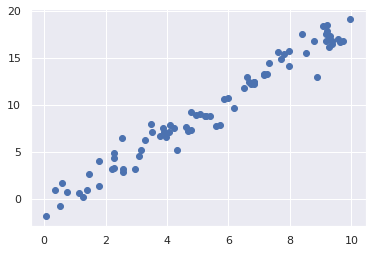

In [ ]:
rng = np.random.RandomState(50)

x = 10 * rng.rand(80)
y = 2 * x - 1 + rng.randn(80)

plt.scatter(x,y)

After processing your data, the first step is to choose a model. For the dataset above, we are going to pick "Linear Regression" model. Simply import your model:

In [ ]:
from sklearn.linear_model import LinearRegression

Next, pick the model hyperparameters

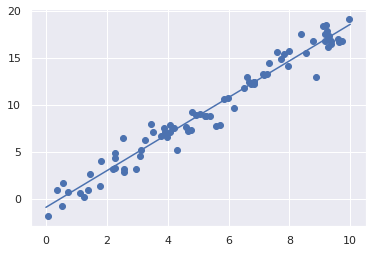

In [ ]:

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

We can check the model settings: 

In [ ]:
print(model.coef_[0])
print(model.intercept_)

1.944535887214308
-0.8492545699739527


### Linear regression on scikit-learn datasets

You can use datasets provided by scikit-learn as well. In the example below, we will apply linear regression to the **diabetes** dataset.

In the diabetes datasets, ten baseline variables; age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Coefficients: 
 [945.32560087]
Mean squared error: 3666.34
R-squared: 0.36


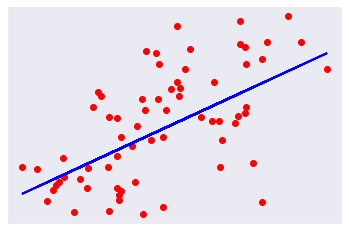

In [ ]:
# Importing diabetes dataset
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
diabetes = load_diabetes()

# Use only one feature -- the following code creates a 1-dimensional 
# array containing just the second feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_data = diabetes_X[:,:,2]

# Split the data into training/testing sets
diabetes_X_train,diabetes_X_test , diabetes_y_train, diabetes_y_test = train_test_split(
                                     diabetes_X_data, diabetes.target, test_size = 0.15 )


# Create linear regression object
m1 = LinearRegression()


# Train the model with training data 
m1.fit(diabetes_X_train, diabetes_y_train)

# Make predictions on test data 
diabetes_y_pred = m1.predict(diabetes_X_test)

#print the coefficient 
print('Coefficients: \n', m1.coef_)

#print the mean squared error
print('Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))


# print the r-squared
print('R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


# Plot 
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()


As you can see, the prediction is not very good. Maybe we can try something different!

#### Exercise 3.1 ( 15 pts)

Run the linear regression on diabetes data with **all the features** in the dataset. 
Calculate the mean squared error and compare the two models. Did using all available features improve the performance ?

In [ ]:
#Your code goes here
diabetes_X_data2 = diabetes.data
#print('x',diabetes_X2)
#print(diabetes_X2.shape)
#diabetes_X_data2 = diabetes_X2[:,:]
#print(diabetes_X_data2)
#print(diabetes_X_data2.shape)

diabetes_X_train2, diabetes_X_test2 , diabetes_y_train2, diabetes_y_test2 = train_test_split(
                                     diabetes_X_data2, diabetes.target, test_size = 0.15 )
m2 = LinearRegression()

# Train the model with training data 
m2.fit(diabetes_X_train2, diabetes_y_train2)

# Make predictions on test data 
diabetes_y_pred2 = m2.predict(diabetes_X_test2)

# Compare the coefficients
print('New coefficients: \n', m2.coef_)
print('Old coefficients:', m1.coef_)

#print the mean squared error
print('New MSE: %.2f'% mean_squared_error(diabetes_y_test2, diabetes_y_pred2))
print('Old MSE: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))

# print the r-squared
print('New R-squared: %.2f' % r2_score(diabetes_y_test2, diabetes_y_pred2))
print('Old R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


New coefficients: 
 [    5.57867762  -256.30778223   491.46719561   366.67048969
 -1096.16980978   680.98299107   214.77456023   234.25598097
   847.13400588    70.09918683]
Old coefficients: [945.32560087]
New MSE: 2641.12
Old MSE: 3666.34
New R-squared: 0.50
Old R-squared: 0.36


Feature selection allows your estimator to perform a better job by decreasing the model complexity and overfitting.
scikit-learn provides several feature selection methods such as `SelectKBest` and `RFE`. Here is an example of using `RFE` or [Recursive feature elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) on diabetes dataset:

In [ ]:
from sklearn.feature_selection import RFE

# Note that this piece of code works with training data and model from Exercise 3.1
# Either choose the same name for your variables or change the variable names below

rfe = RFE(estimator = m2 , n_features_to_select = 2 , step = 1)
rfe.fit(diabetes_X_train2, diabetes_y_train2)

print(rfe.ranking_)

[9 5 1 4 2 3 7 6 1 8]


#### Exercise 3.2 (20 pts)

Calculate and print the mean squared error using two features. Which model performs better? (the more complex one with all features, or the simpler model using fewer features)
(Note that `RFE` has a predict function you can use)



In [ ]:
# Your code goes here 
# transform
x_transformed_train = rfe.transform(diabetes_X_train2)
x_transofrmed_test = rfe.transform(diabetes_X_test2)

m3 = LinearRegression()
rfe2 = RFE(estimator=m3, n_features_to_select=2, step=1)
rfe2.fit(x_transformed_train, diabetes_y_train2)

p1 = rfe2.predict(x_transofrmed_test)

print('New LinearRegression MSE: %.2f'% mean_squared_error(diabetes_y_test2, diabetes_y_pred2))
print('RFE Two-Parameter Prediction MSE: %.2f'% mean_squared_error(diabetes_y_test2, p1)) 

print('RFE slightly reduces the MSE')

New LinearRegression MSE: 2641.12
RFE Two-Parameter Prediction MSE: 2429.23
RFE slightly reduces the MSE


### Linear regression on the Boston house price dataset

Now it's your turn to perform a linear regression on the Boston housing dataset.

#### Exercise 3.3 ( 20 pts)

Train a set of linear regression models to predict the house prices for boston house dataset. You should use all the available features and train multiple linear regression models for:

* a) 30% training, 70% testing 
* b) 50% training, 50% testing
* c) 70% training, 30% testing
* d) 80% training, 20% testing

Plot the mean squared error for all models. 

For training set, 30.0 MSE: 25.730577151446276
For training set, 50.0 MSE: 22.86401874764827
For training set, 70.0 MSE: 34.75748776193152
For training set, 80.0 MSE: 22.804613148277127


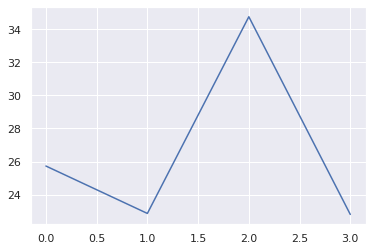

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
train_splits = [0.3, 0.5, 0.7, 0.8]
mse_list = []

# get the data
data_x = boston.data

#Your code goes here
for e in train_splits:

  # get the model
  m = LinearRegression()

  # split the data 
  h_X_train, h_X_test , h_y_train, h_y_test = train_test_split(
                                      data_x, boston.target, test_size = (1-e))

  # Train the model with training data 
  m.fit(h_X_train, h_y_train)

  # Make predictions on test data 
  pred = m.predict(h_X_test)
  mse = mean_squared_error(h_y_test, pred)
  mse_list.append(mse)

  print('For training set,',e*100,'MSE:',mse)

#print(mse_list)
plt.plot(mse_list)

 #### Exercise 3.4  ( 45 pts)
 
Use `RFE` to find the best set of features for prediction. What are they? 
(Note that in order to find the best set of features for prediction, you need to consider all possible combinations, from 1 to d features, calculate the MSE for each one and pick the set of features that give you the min MSE)


Use the same train-test splits from 3.3, to train new models with the best set of features for prediction. Plot the mean squared error for each linear regression models and given train-test split.

There's a total of 13 features.
n = 2
Ranking: [ 7  8 11  2  1  1 12  4  6  9  3 10  5]
Names: ['NOX' 'RM']
MSE: 37.28993162222593

n = 3
Ranking: [ 6  7 10  1  1  1 11  3  5  8  2  9  4]
Names: ['CHAS' 'NOX' 'RM']
MSE: 34.34765248322249

n = 4
Ranking: [ 5  6  9  1  1  1 10  2  4  7  1  8  3]
Names: ['CHAS' 'NOX' 'RM' 'PTRATIO']
MSE: 30.84475820746245

n = 5
Ranking: [4 5 8 1 1 1 9 1 3 6 1 7 2]
Names: ['CHAS' 'NOX' 'RM' 'DIS' 'PTRATIO']
MSE: 28.529945170363124

n = 6
Ranking: [3 4 7 1 1 1 8 1 2 5 1 6 1]
Names: ['CHAS' 'NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']
MSE: 23.12112166129604

n = 7
Ranking: [2 3 6 1 1 1 7 1 1 4 1 5 1]
Names: ['CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'PTRATIO' 'LSTAT']
MSE: 22.89771623650139

n = 8
Ranking: [1 2 5 1 1 1 6 1 1 3 1 4 1]
Names: ['CRIM' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'PTRATIO' 'LSTAT']
MSE: 22.790273864065984

n = 9
Ranking: [1 1 4 1 1 1 5 1 1 2 1 3 1]
Names: ['CRIM' 'ZN' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'PTRATIO' 'LSTAT']
MSE: 23.136113615828314

n = 10
Ranking: [1 1 3

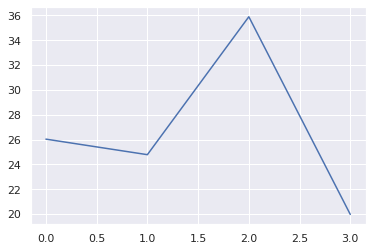

In [ ]:
#Your code goes here
# find out how many features

n = h_X_train.shape[1]
# collect all mse and num features
d = list()
f = list()
r = list()
num = list()
print("There's a total of",n,'features.')

for e in range(n)[1:]:
  e = e+1
  rfe_h = RFE(estimator = m , n_features_to_select = e , step = 1)
  rfe_h.fit(h_X_train, h_y_train)

  print('n =',e)
  print('Ranking:',rfe_h.ranking_)
  r.append(rfe_h.ranking_)
  print('Names:',boston.feature_names[rfe_h.support_])
  f.append(boston.feature_names[rfe_h.support_])
  
  X_train = rfe_h.transform(h_X_train)
  X_test = rfe_h.transform(h_X_test)

  rfe_h.fit(X_train, h_y_train)
  pred_y = rfe_h.predict(X_test)
  mse_1= mean_squared_error(h_y_test, pred_y)
  print('MSE:',mse_1)
  d.append(mse_1)
  num.append(e)
  print()

# find best num features and their mse
i = min(d)
print('Min MSE:',i)
print('Num features:', num[d.index(i)])
print('Features:',f[d.index(i)])

# detect what columns to get
col = []
best_rank = r[d.index(i)]
count = 0
for e in best_rank:
  if e == 1:
    col.append(count)
  count+=1

#print(col)
print()
mse_list2 = list()
# train on different splits
for e in train_splits:
  data_x2 = boston.data[:,col]
  # get the model
  m_n = LinearRegression()

  # split the data 
  h_X_train2, h_X_test2, h_y_train2, h_y_test2 = train_test_split(
                                      data_x2, boston.target, test_size = (1-e))

  # Train the model with training data 
  m_n.fit(h_X_train2, h_y_train2)

  # Make predictions on test data 
  pred2 = m_n.predict(h_X_test2)
  mse2 = mean_squared_error(h_y_test2, pred2)
  mse_list2.append(mse2)

  print('For training set,',e*100,'MSE:',mse2)

print()
print()
print()
plt.plot(mse_list2)